# Constituency Grammars with NLTK

- Evgeny A. Stepanov
- stepanov.evgeny.a@gmail.com

## Objectives
- Understanding: 
    - relation between grammar and syntactic parse tree
    - relation between grammar and syntactic categories
    - relation between grammar and Part-of-Speech tags
    - context free grammars (CFG)
    - probabilistic context free grammars (PCFG)
- Learning how to:
    - define CFG in NLTK
    - parse with CFG
    - learn PCFGs from a treebank
    - parse with PCFG
    - generate sentences using a grammar in NLTK
    - evaluate parser

### Recommended Reading
- Dan Jurafsky and James H. Martin. [__Speech and Language Processing__ (SLP)](https://web.stanford.edu/~jurafsky/slp3/) (3rd ed. draft)
- Steven Bird, Ewan Klein, and Edward Loper. [__Natural Language Processing with Python__ (NLTK)](https://www.nltk.org/book/)

### Covered Material
- SLP
    - [Chapter 12: Constituency Grammars](https://web.stanford.edu/~jurafsky/slp3/12.pdf)
    - [Chapter 13: Constituency Parsing](https://web.stanford.edu/~jurafsky/slp3/13.pdf)
- NLTK 
    - [Chapter 8: Analyzing Sentence Structure](https://www.nltk.org/book/ch08.html)

### Requirements

- [NLTK](https://www.nltk.org/)

## 1. Grammars, Production Rules, and Parse Trees

In linguistics, [**syntax**](https://en.wikipedia.org/wiki/Syntax) is the study of how words and morphemes combine to form larger units such as phrases and sentences. Central concerns of syntax include word order, **grammatical relations**, **hierarchical sentence structure** (constituency), agreement, the nature of crosslinguistic variation, and the relationship between form and meaning.

In linguistics, the [**grammar**](https://en.wikipedia.org/wiki/Grammar) of a natural language is its set of structural constraints on speakers' or writers' composition of clauses, phrases, and words.

A [**context-free grammar (CFG)**](https://en.wikipedia.org/wiki/Context-free_grammar) is a formal grammar whose [**production rules**](https://en.wikipedia.org/wiki/Production_(computer_science)) are of the form:

$$A \to \alpha$$

where: 
- $A$ a single nonterminal symbol
- $\alpha$  a string of terminals and/or nonterminals

[**Parsing**](https://en.wikipedia.org/wiki/Parsing), syntax analysis, or syntactic analysis is the process of analyzing a string of symbols, either in natural language, computer languages or data structures, conforming to the rules of a formal grammar. 
Within computational linguistics the term is used to refer to the formal analysis by a computer of a sentence or other string of words into its **constituents**, resulting in a **parse tree** showing their syntactic relation to each other.

A [**parse tree**](https://en.wikipedia.org/wiki/Parse_tree) or **parsing tree** or **derivation tree** or **concrete syntax tree** is an ordered, rooted tree that represents the syntactic structure of a string according to some **context-free grammar**. The term parse tree itself is used primarily in computational linguistics; in theoretical syntax, the term syntax tree is more common.

### 1.1. Parse Tree Representation
One of the possible parse trees for a sentence `I saw the man with a telescope` is as below:

```
      S                                    
  ____|___________                          
 |                VP                       
 |     ___________|________                 
 |    |       |            PP              
 |    |       |        ____|___             
 NP   |       NP      |        NP          
 |    |    ___|___    |     ___|______      
PRON  V  Det      N   P   Det         N    
 |    |   |       |   |    |          |     
 I   saw the     man with  a      telescope
 ```

To occupy less space, a parse tree is usually represented using "bracketed expressions", where brackets enclose each **constituent** and the first element of the expression is the tree-node label.

```
(S
  (NP (PRON I))
  (VP
    (V saw)
    (NP (Det the) (N man))
    (PP (P with) (NP (Det a) (N telescope)))))
```


It is common to write a parse tree in a less readable one-line expression:

```
(S (NP (PRON I)) (VP (V saw) (NP (Det the) (N man)) (PP (P with) (NP (Det a) (N telescope)))))
```

### 1.2. Parse Trees in NLTK

NLTK provides [`Tree`](https://www.nltk.org/api/nltk.tree.tree.html) class for representing hierarchical language structures. The class implements many useful methods.

#### 1.2.1. "Core" Methods

- `fromstring()` reads a bracketed tree string and return the resulting tree

- `productions()` generate the productions that correspond to the non-terminal nodes of the tree.
    - For each subtree of the form `(P: C1 C2 ... Cn)` this produces a production of the form `P -> C1 C2 ... Cn`.

- `label()` returns the node label of the tree

- `subtrees()` generates all the subtrees of this tree

- `pos()` return a sequence of pos-tagged words extracted from the tree.

- `leaves()` returns the leaves of the tree.

- `flatten()` return a flat version of the tree, with all non-root non-terminals removed.

In [2]:
from nltk.tree import Tree
sent = "I saw the man with a telescope"
parse_tree_str = "(S (NP (PRON I)) (VP (V saw) (NP (Det the) (N man)) (PP (P with) (NP (Det a) (N telescope)))))"

tree = Tree.fromstring(parse_tree_str)


In [3]:
# prints bracketed expression for the parse tree
print(tree)

(S
  (NP (PRON I))
  (VP
    (V saw)
    (NP (Det the) (N man))
    (PP (P with) (NP (Det a) (N telescope)))))


In [4]:
# prints all the subtrees
for stree in tree.subtrees():
    print(stree)

(S
  (NP (PRON I))
  (VP
    (V saw)
    (NP (Det the) (N man))
    (PP (P with) (NP (Det a) (N telescope)))))
(NP (PRON I))
(PRON I)
(VP
  (V saw)
  (NP (Det the) (N man))
  (PP (P with) (NP (Det a) (N telescope))))
(V saw)
(NP (Det the) (N man))
(Det the)
(N man)
(PP (P with) (NP (Det a) (N telescope)))
(P with)
(NP (Det a) (N telescope))
(Det a)
(N telescope)


#### 1.2.2 Visualizaing Parse Trees

In the code above, we have printed the parse tree using `print()` method, which prints a _bracketed expression_ tree.
It is also possible to visualize syntactic trees of using other method: 

- `pprint()` the same as above
- `pretty_print()` draws ASCII tree (the original example)
- `draw()` opens a new window containing a graphical diagram of this tree.
- `tree` a call to a tree draws it using `svgling`
    - requires `svgling` module to be installed (`pip install svgling`)

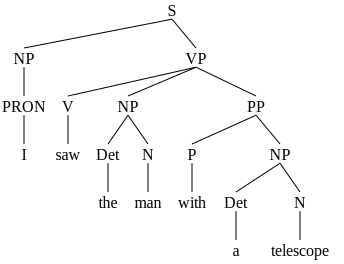

In [5]:
tree

#### Exercise
Familiarize with the [`Tree`](https://www.nltk.org/api/nltk.tree.tree.html) class.

- Consult the documentation for more detail (and other methods)
- Try each of the "core" methods listed above
    - see production rules, leaves, and pos


## 2. Context Free Grammars (CFG)

### 2.1. Defining Context Free Grammars

CFG are defined by a *start symbol* and a set of *production rules*. The *start symbol* defines the root node of parse trees (usually __S__). 

*Production rules* specify allowed parent-child relations in a parse tree. Each production specifies what node can be the parent of a particular set of children nodes. 

For example, the production `S -> NP VP` specifies that an `S` node can be the parent of an `NP` node and a `VP` node.

The left-hand side of a production rules specifies potential *non-terminal* parent nodes; while right-hand side specifies list of allowed *non-terminal* and *terminal* (text) children. 

A production like `VP -> V NP | VP PP` has a disjunction on the right-hand side, shown by the `|` and is an abbreviation for the two productions `VP -> V NP` and `VP -> V NP PP`.



#### 2.1.1 Syntactic Categories

| __Symbol__ | __Meaning__ | __Example__ |
|:-----------|:------------|:------------|
| S   | sentence             | I saw the man |
| NP  | noun phrase          | the man | 
| VP  | verb phrase          | saw the man |
| PP  | prepositional phrase | with a telescope |
| Det | determiner  | the |
| N   | noun        | man |
| V   | verb        | saw |
| P   | preposition | with |


- Non-Terminals: `S`, `NP`, `VP`, `PP`
- Pre-Terminals: `Det`, `N`, `V`, `P` (Part-of-Speech Tags)
- Terminals (Leaves): the, man, saw, ...

### 2.2. Defining Context Free Grammars in NLTK

The grammar can be defined as a string or as a list of strings of production rules.

In [6]:
import nltk

rules = [
    'S -> NP VP',
    'NP -> Det N | Det N PP | PRON',
    'VP -> V NP | V NP PP',
    'PP -> P NP',
    'Det -> "the" | "a"',
    'N -> "man" | "telescope"',
    'PRON -> "I"',
    'V -> "saw"',
    'P -> "with"'   
]

toy_grammar = nltk.CFG.fromstring(rules)

print(toy_grammar)


Grammar with 14 productions (start state = S)
    S -> NP VP
    NP -> Det N
    NP -> Det N PP
    NP -> PRON
    VP -> V NP
    VP -> V NP PP
    PP -> P NP
    Det -> 'the'
    Det -> 'a'
    N -> 'man'
    N -> 'telescope'
    PRON -> 'I'
    V -> 'saw'
    P -> 'with'


Grammar object has 2 components:
- start symbol
- production rules

Those can be access as follows.

In [7]:
print(toy_grammar.start())

S


In [8]:
print(toy_grammar.productions())

[S -> NP VP, NP -> Det N, NP -> Det N PP, NP -> PRON, VP -> V NP, VP -> V NP PP, PP -> P NP, Det -> 'the', Det -> 'a', N -> 'man', N -> 'telescope', PRON -> 'I', V -> 'saw', P -> 'with']


Each production has 2 parts:
- left-hand side
- right-hand side

which can be accessed as follows:

In [9]:
rule = toy_grammar.productions()[0]
print(rule.lhs())
print(rule.rhs())

S
(NP, VP)


__Grammar__'s `productions(lhs=None, rhs=None, empty=False)` methos returns the grammar productions, filtered by the left-hand side or the first item in the right-hand side.

__Parameters__
- `lhs` -- Only return productions with the given left-hand side.
- `rhs` -- Only return productions with the given first item in the right-hand side.
- `empty` -- Only return productions with an empty right-hand side

In [11]:
from nltk import Nonterminal
toy_grammar.productions(lhs=Nonterminal('NP'))

[NP -> Det N, NP -> Det N PP, NP -> PRON]

In [12]:
toy_grammar.productions(rhs=Nonterminal('NP'))

[S -> NP VP]

In [13]:
toy_grammar.productions(empty=True)

dict_values([])

### 2.3. Parsing with CFG

> A parser processes input sentences according to the productions of a grammar, and builds one or more constituent structures that conform to the grammar. A grammar is a declarative specification of well-formedness — it is actually just a string, not a program. A parser is a procedural interpretation of the grammar. It searches through the space of trees licensed by a grammar to find one that has the required sentence along its fringe (outer edges).


#### 2.3.1. Available CFG Parsers in NLTK

- Recursive descent parsing
    - top-down algorithm
    - pro: finds all successful parses.
    - con: inefficient. will try all rules brute-force, even the ones that do not match the input. Goes into an infinite loop when handling a left-recursive rule.
    - `nltk.RecursiveDescentParser()`

- Shift-reduce parsing
    - bottom-up algorithm
    - pro: efficient. only works with the rules that match input words.
    - con: may fail to find a legitimate parse even when there is one.
    - `nltk.ShiftReduceParser()`

- The left-corner parser
    - a top-down parser with bottom-up filtering
    - `nltk.LeftCornerChartParser()`: combines left-corner parsing and chart parsing

- Chart parsing
    - utilizes dynamic programming: builds and refers to well-formed substring tables (WFST)
    - pro: efficient.
    - con: may take up a big memory space when dealing with a long sentence.
    - `nltk.ChartParser()`


In [14]:
parser = nltk.ChartParser(toy_grammar)

sent = "I saw the man with a telescope"

for tree in parser.parse(sent.split()):
    print(tree)

(S
  (NP (PRON I))
  (VP
    (V saw)
    (NP (Det the) (N man))
    (PP (P with) (NP (Det a) (N telescope)))))
(S
  (NP (PRON I))
  (VP
    (V saw)
    (NP (Det the) (N man) (PP (P with) (NP (Det a) (N telescope))))))


The sentence produces two possible parse trees. Thus, it is said to be structurally ambiguous -- prepositional phrase attachment ambiguity.

#### Exercise

- Define grammar that covers the following sentences.

    - show flights from new york to los angeles
    - list flights from new york to los angeles
    - show flights from new york
    - list flights to los angeles
    - list flights
    
- Use one of the parsers to parse the sentences (i.e. test your grammar)


In [15]:
# test setenteces
test_sents = [
    "show flights from new york to los angeles", 
    "list flights from new york to los angeles",
    "show flights from new york",
    "list flights to los angeles",
    "list flights"]

### 2.3.2. "Real" Grammars

It is possible to load a grammar written by someone else into NLTK.

- run `nltk.download()`
- go to `Models` tab
- download `large_grammars`


In [18]:
nltk.download('large_grammars')

[nltk_data] Downloading package large_grammars to
[nltk_data]     /Users/eas/nltk_data...
[nltk_data]   Package large_grammars is already up-to-date!


True

In [19]:
atis_grammar = nltk.data.load('grammars/large_grammars/atis.cfg')
atis_parser = nltk.ChartParser(atis_grammar)

In [20]:
atis_grammar

<Grammar with 5517 productions>

The grammar comes with some test sentences.

In [21]:
atis_test_sentences = nltk.data.load('grammars/large_grammars/atis_sentences.txt')
atis_test_sentences = nltk.parse.util.extract_test_sentences(atis_test_sentences)
print(atis_test_sentences[0])

(['i', 'need', 'a', 'flight', 'from', 'charlotte', 'to', 'las', 'vegas', 'that', 'makes', 'a', 'stop', 'in', 'saint', 'louis', '.'], 2085)


Each test sentence is a tuple of a list of sentence words and a number of possible parses with respect to the grammar.

In [22]:
# let's check the number of parses our parser produces
for sent, pnum in atis_test_sentences[:3]:
    parses = atis_parser.parse(sent)
    print(len(list(parses)), pnum)

2085 2085
1380 1380
50 50


#### Exercise
Parse the sentences from the excercise above using **ATIS_GRAMMAR**
- try different parsers
- output the number of parses each sentence yields 

## 3. Probabilistic Context Free Grammars (PCFG)

PCFGs are very similar to CFGs - they just have an additional probability for each production. 

For a given left-hand-side non-terminal, the sum of the probabilities must be 1.0!

In [23]:
weighted_rules = [
    'S -> NP VP [1.0]',
    'NP -> Det N [0.6]',
    'NP -> Det N PP [0.3]',
    'NP -> PRON [0.1]',
    'VP -> V NP [0.7]',
    'VP -> V NP PP [0.3]',
    'PP -> P NP [1.0]',
    'Det -> "the" [0.5]',
    'Det -> "a" [0.5]',
    'N -> "man" [0.5]',
    'N -> "telescope" [0.5]',
    'PRON -> "I" [1.0]',
    'V -> "saw" [1.0]',
    'P -> "with" [1.0]'   
]

toy_grammar = nltk.PCFG.fromstring(weighted_rules)

print(toy_grammar)

Grammar with 14 productions (start state = S)
    S -> NP VP [1.0]
    NP -> Det N [0.6]
    NP -> Det N PP [0.3]
    NP -> PRON [0.1]
    VP -> V NP [0.7]
    VP -> V NP PP [0.3]
    PP -> P NP [1.0]
    Det -> 'the' [0.5]
    Det -> 'a' [0.5]
    N -> 'man' [0.5]
    N -> 'telescope' [0.5]
    PRON -> 'I' [1.0]
    V -> 'saw' [1.0]
    P -> 'with' [1.0]


On top of right-hand side and left-hand side, probabilistic rules have probabilities.

In [24]:
rule = toy_grammar.productions()[0]
print(rule.lhs())
print(rule.rhs())
print(rule.prob())

S
(NP, VP)
1.0


### 3.1. Learning Grammars from a Treebank

The most important method consists of inducing a PCFG from trees in a treebank (`induce_pcfg()`). 

NLTK provides portion of Penn Treebank corpus, which we can utilize to induce rules.

In [25]:
nltk.download('treebank')

[nltk_data] Downloading package treebank to /Users/eas/nltk_data...
[nltk_data]   Package treebank is already up-to-date!


True

Production rules can be extracted using `productions()` method iterating over parsed sentences in the corpus.

In [26]:
from nltk.corpus import treebank

print(treebank)

productions = []
# let's keep it small
for item in treebank.fileids():
  for tree in treebank.parsed_sents(item):
    productions += tree.productions()
    
print(len(productions))

<BracketParseCorpusReader in '.../corpora/treebank/combined' (not loaded yet)>
179360


The grammar can be induced as follows:

In [27]:
from nltk import Nonterminal
S = Nonterminal('S')
grammar = nltk.induce_pcfg(S, productions)

In [28]:
grammar

<Grammar with 21763 productions>

### 3.2. PCFG Parsers in NLTK
NLTK provides several PCFG parsers:

From `nltk.parse.viterbi`

- ViterbiParser
    - A bottom-up PCFG parser that uses dynamic programming to find the single most likely parse for a text. The ViterbiParser parser parses texts by filling in a “most likely constituent table”. This table records the most probable tree representation for any given span and node value. In particular, it has an entry for every start index, end index, and node value, recording the most likely subtree that spans from the start index to the end index, and has the given node value.

From `nltk.parse.pchart` module

- InsideChartParser
    - A bottom-up parser for PCFG grammars that tries edges in descending order of the inside probabilities of their trees.
    - use `beam_size = len(tokens)+1` argument
    
- RandomChartParser
    - A bottom-up parser for PCFG grammars that tries edges in random order. This sorting order results in a random search strategy.
    
- UnsortedChartParser
    - A bottom-up parser for PCFG grammars that tries edges in whatever order.

- LongestChartParser
    - A bottom-up parser for PCFG grammars that tries longer edges before shorter ones. This sorting order results in a type of best-first search strategy.

Read about them in the [documentation](http://www.nltk.org/api/nltk.parse.html).

Let's parse one of the sentences from above using Viterbi parser.

In [29]:
parser = nltk.ViterbiParser(grammar)

for tree in parser.parse("Show me flights from New York to Los Angeles".split()):
    print(tree)

(S
  (NP-SBJ (NNP Show))
  (NP-PRD
    (NP (NP (PRP me)) (NNS flights))
    (PP
      (IN from)
      (NP
        (NP (NNP New) (NNP York))
        (PP (TO to) (NP (NNP Los) (NNP Angeles))))))) (p=1.23346e-35)


### Exercise

- Try different parser to parse the sentences from the exercises above
- Compare assigned probabilities
- Compare time it takes to parse sentences

## 4. Generating Sentences

Grammars can be used to generate sentences as well. This is accomplished using `generate` method.
read [here](http://www.nltk.org/api/nltk.parse.html#module-nltk.parse.generate)

arguments it takes are the following `nltk.parse.generate.generate(grammar, start=None, depth=None, n=None)`:

- grammar – The Grammar used to generate sentences.
- start – The Nonterminal from which to start generate sentences.
- depth – The maximal depth of the generated tree.
- n – The maximum number of sentences to return.

In [30]:
from nltk.parse.generate import generate

for sent in generate(toy_grammar, n=10):
    print(sent)

['the', 'man', 'saw', 'the', 'man']
['the', 'man', 'saw', 'the', 'telescope']
['the', 'man', 'saw', 'a', 'man']
['the', 'man', 'saw', 'a', 'telescope']
['the', 'man', 'saw', 'the', 'man', 'with', 'the', 'man']
['the', 'man', 'saw', 'the', 'man', 'with', 'the', 'telescope']
['the', 'man', 'saw', 'the', 'man', 'with', 'a', 'man']
['the', 'man', 'saw', 'the', 'man', 'with', 'a', 'telescope']
['the', 'man', 'saw', 'the', 'man', 'with', 'the', 'man', 'with', 'the', 'man']
['the', 'man', 'saw', 'the', 'man', 'with', 'the', 'man', 'with', 'the', 'telescope']


### Exercise

- Use the grammar defined by you to generate sentences.
- Experiment with `depth` and `start` paramenters

## 5. Evaluating Constituency Parsers

### 5.1. Comparing Trees

Since _constituency parser_ outputs _constituents_, parser evaluation is essentially a comparison between constituents of the reference and the automatic (hypothesis) parse trees (of the test set). Since constituents are labeled (have _syntactic categories_), the evaluation can also compare the reference and the hypothesis labels.

A constituent in a hypothesis parse tree is considered correct, if there is a constituent in a reference parse tree that has the same span and label. That is:

- has the same starting point
- has the same ending point
- has the same non-terminal symbol

Using this information we can compute precision and recall for the parser, as:

$$ \text{recall} = \frac{\text{# of correct constituents in hypothesis}}{\text{# of constituents in reference}}$$

$$ \text{precision} = \frac{\text{# of correct constituents in hypothesis}}{\text{# of constituents in hypothesis}}$$

The $F_1$ metric is computed the usual way, as:

$$F_1 = \frac{2PR}{P+R}$$

In case for the correct constituent counts we consider labels, we compute _labeled_ precision and recall. Otherwise, metrics are _unlabeled_. 

### 5.2. PARSEVAL
The evaluation method that implements this is known as **PARSEVAL** [(Black et al., 1991)](https://aclanthology.org/H91-1060/).

The metric includes an algorithm from _caninicalization_ that removes grammar-specific information and allows comparing parsers with different grammars.

The "canonical" implementation of **PARSEVAL** is known as [**EVALB**](https://nlp.cs.nyu.edu/evalb/).

Since constitents are essentially sub-trees of a sentence parse tree, while having the same label and start and end points, they might differ in their internal structure. 

e.g.: `((A B) C)` vs. `(A (B C))`

Consequently, there is an additional metric in **PARSEVAL** that is used to account for this -- **cross-brackets** (since parse trees are represented using bracketed notation) -- which is a simple count of such cases per sentence.

However, since `((A B) C)` and `(A (B C))` have different constituents, this is already reflected in precision and recall. 

### 5.1. EVALB (PYTHON)
There is no officially supported EVALB for python. However, there are few implementations available.
The most easy to use it [PYEVALB](https://github.com/flyaway1217/PYEVALB).

It is possible to compare two parse trees as the following:

In [31]:
#!pip install PYEVALB
from PYEVALB import scorer as eval_scorer
from PYEVALB import parser as eval_parser

pt0 = "(S (NP (PRON I)) (VP (V saw) (NP (Det the) (N man)) (PP (P with) (NP (Det a) (N telescope)))))"
pt1 = "(S (NP (PRON I)) (VP (V saw) (NP (Det the) (N man) (PP (P with) (NP (Det a) (N telescope))))))"

pt0_tree = eval_parser.create_from_bracket_string(pt0)
pt1_tree = eval_parser.create_from_bracket_string(pt1)

s = eval_scorer.Scorer()
result = s.score_trees(pt0_tree, pt1_tree)

In [32]:
print("P: {} R: {}".format(round(result.prec, 2), round(result.recall, 2)))

P: 0.83 R: 0.83


## Lab Exercise
Comparatively evaluate any 2 PCFG parsers. 

- create a trainin/testing split of the available treebank data
- extract productions from the training set parse trees
- induce grammars
- parse the testing set sentences and evaluate using `evalb`

The challenge is in 
- converting of treebank trees to the required formats for evaluation
- converting the output of a parser in the required format for evaluation